In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [2]:
df=pd.read_html("https://www.espncricinfo.com/series/wpl-2024-25-1463356/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df=df.drop([1,3,5,7,9],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Royal Challengers Bengaluru Women,2,2,0,0,0,4,1.440,WW,"vs MI-W, UPW-W, GG-W",348/34.5,342/40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Mumbai Indians Women,2,1,1,0,0,2,0.783,LW,"vs RCB-W, UPW-W, DC-W",286/36.1,285/40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Gujarat Giants Women,3,1,2,0,0,2,-0.525,LWL,"vs DC-W, RCB-W, UPW-W",465/58.0,467/54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4Delhi Capitals Women,2,1,1,0,0,2,-0.882,WL,"vs UPW-W, UPW-W, GG-W",306/40.0,310/36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5UP Warriorz Women,1,0,1,0,0,0,-0.850,L,"vs DC-W, DC-W, RCB-W",143/20.0,144/18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.reset_index(inplace=True)

In [ ]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [ ]:
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Royal Challengers Bengaluru Women,2,2,0,0,0,4,1.440,WW,...,348/34.5,342/40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,2,1,1,0,0,2,0.783,LW,...,286/36.1,285/40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Gujarat Giants Women,3,1,2,0,0,2,-0.525,LWL,...,465/58.0,467/54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Delhi Capitals Women,2,1,1,0,0,2,-0.882,WL,...,306/40.0,310/36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,UP Warriorz Women,1,0,1,0,0,0,-0.850,L,...,143/20.0,144/18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Teams'].unique()

array(['Royal Challengers Bengaluru Women', 'Mumbai Indians Women',
       'Gujarat Giants Women', 'Delhi Capitals Women',
       'UP Warriorz Women'], dtype=object)

In [ ]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Royal Challengers Bengaluru Women,2,2,0,0,0,4,1.440,WW,...,348/34.5,342/40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,2,1,1,0,0,2,0.783,LW,...,286/36.1,285/40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Gujarat Giants Women,3,1,2,0,0,2,-0.525,LWL,...,465/58.0,467/54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Delhi Capitals Women,2,1,1,0,0,2,-0.882,WL,...,306/40.0,310/36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,UP Warriorz Women,1,0,1,0,0,0,-0.850,L,...,143/20.0,144/18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Rk']=np.arange(1,6)

In [ ]:
df['Teams']=[x.split(' Women')[0] for x in df['Teams']]

In [ ]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [ ]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [ ]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,2,2,0,0,0,4,1.440
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,2,1,1,0,0,2,0.783
2,3,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,3,1,2,0,0,2,-0.525
3,4,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,2,1,1,0,0,2,-0.882
4,5,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,1,0,1,0,0,0,-0.850


In [ ]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [ ]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

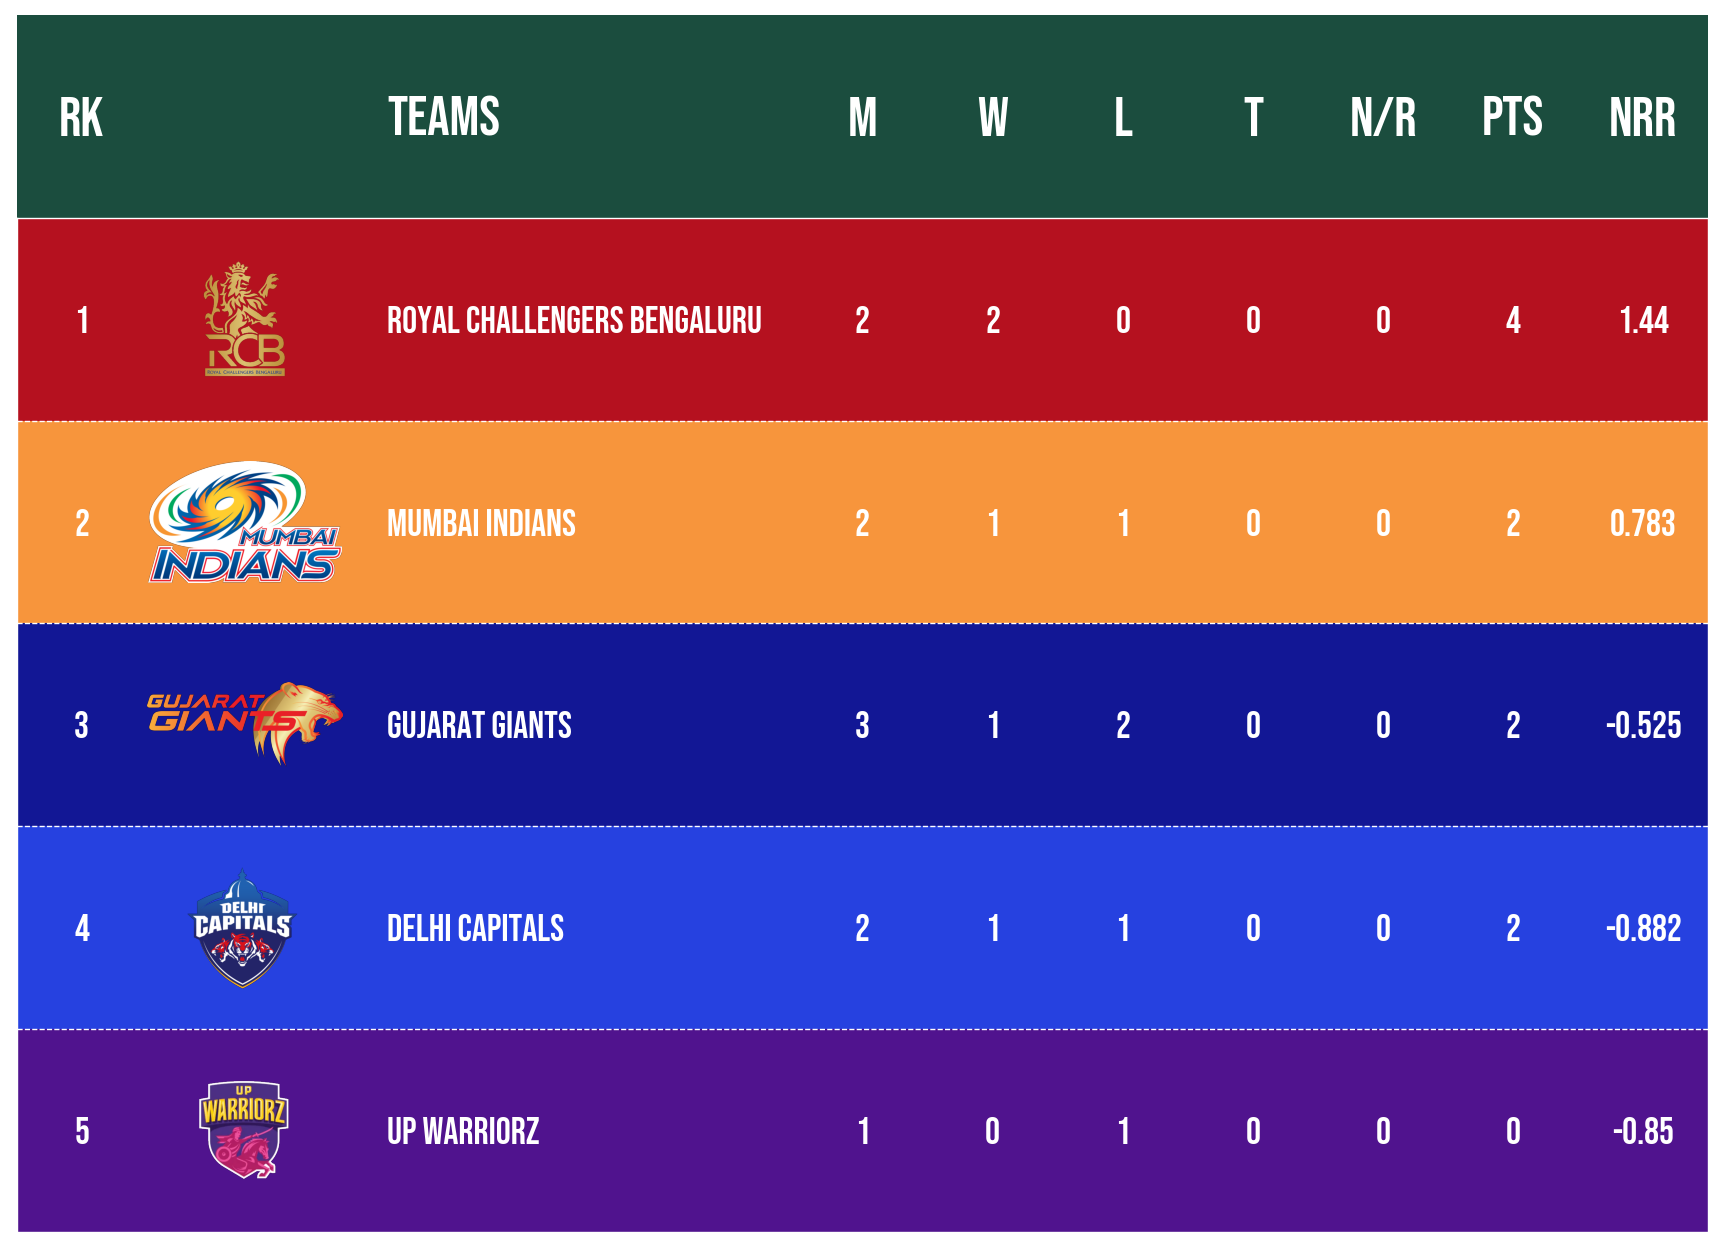

In [ ]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#1B4D3E')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#B5111F")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#F7953C")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#121795")
table.rows[2].set_fontcolor("#ffffff")
#rcb
table.rows[3].set_facecolor("#2641E0")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#50138E")
table.rows[4].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [ ]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)